# <mobile_price 데이터 셋을 이용한 SVM 실습>
## 휴대폰의 여러가지 특성을 기반으로 가격 범위를 예측하는 분류 실습입니다. 

다음은 mobile_price.csv 데이터에 대한 설명 입니다.

- battery_power: Total energy a battery can store in one time measured in mAh
- blue: Has bluetooth or not
- clock_speed: speed at which microprocessor executes instructions
- dual_sim: Has dual sim support or not	
- fc: Front Camera mega pixels
- four_g: Has 4G or not
- int_memory: Internal Memory in Gigabytes	
- m_dep: Mobile Depth in cm
- mobile_wt: Weight of mobile phone
- n_cores: Number of cores of processor	
- pc: Primary Camera mega pixels
- px_height: Pixel Resolution Height
- px_width: Pixel Resolution Width
- ram: Random Access Memory in Megabytes
- sc_h: Screen Height of mobile in cm
- sc_w: Screen Width of mobile in cm
- talk_time: longest time that a single battery charge will last when you are
- three_g: Has 3G or not
- touch_screen: Has touch screen or not
- wifi: Has wifi or not

<br>
더 자세한 데이터 정보는 https://www.kaggle.com/iabhishekofficial/mobile-price-classification 에서 확인하시면 됩니다.





In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns 

### 1. mobile_price.csv 데이터 셋을 가져와서 처음 5개 행을 확인하시오.

In [2]:
import pandas as pd
df=pd.read_csv("C:\\Users\\LG-PC\\Desktop\\유런과제\\mobile_price.csv")

### 2. info() 함수를 이용해 데이터프레임의 기본 정보를 확인하시오.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

### 3. describe() 함수를 이용해 Target 칼럼 'price_range'의 정보를 확인하시오.

In [5]:
df['price_range'].describe()

count    2000.000000
mean        1.500000
std         1.118314
min         0.000000
25%         0.750000
50%         1.500000
75%         2.250000
max         3.000000
Name: price_range, dtype: float64

### 4. unique()함수를 이용해 Target 클래스의 종류를 확인하시오.

In [6]:
df['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

### 5. 피처 간 상관관계를 분석하시오.

<AxesSubplot:>

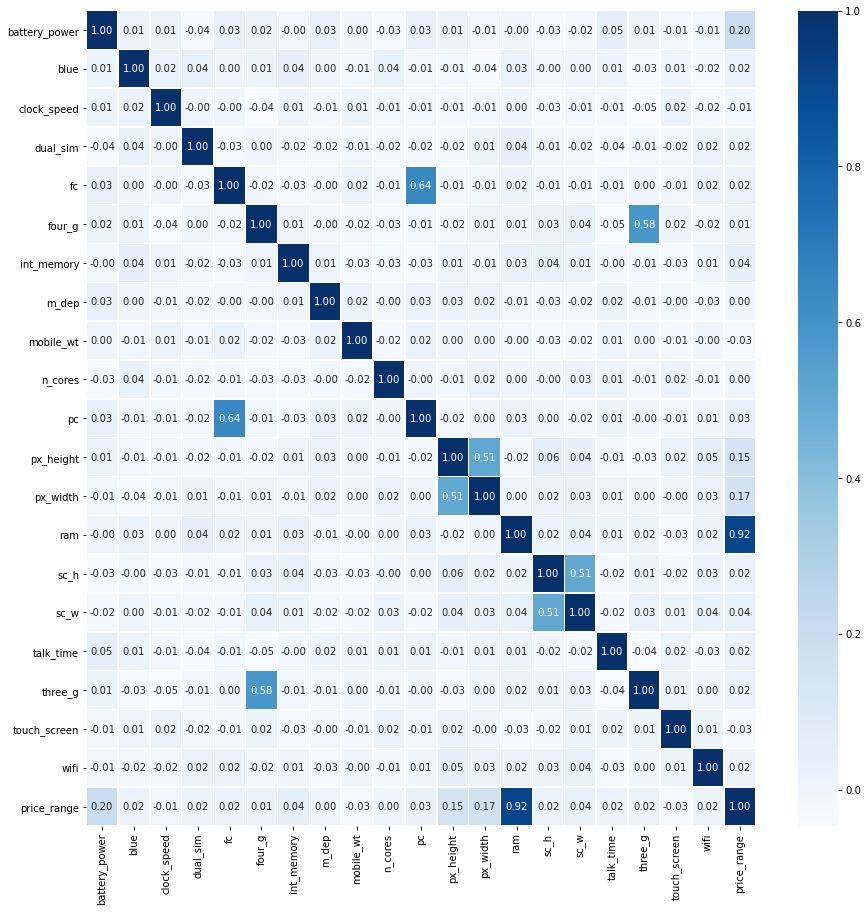

In [23]:
re = features.corr(method='pearson')

plt.figure(figsize=(15,15))
sns.heatmap(data = df.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [50]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score

### 6. 데이터의 타깃 칼럼을 분리해, X_mobile과 y_mobile으로 저장하시오

In [51]:
x_mobile=df.iloc[:,0:20]
y_mobile=df.iloc[:,20]

### 7. 피처에 대해 MinMaxScaler()를 이용해 스케일링을 진행하시오.

In [52]:
min_max_scaler = MinMaxScaler()
x_mobile_scaled=min_max_scaler.fit_transform(x_mobile)

### 8. train_test_split를 사용하여 train 셋과 test 셋을 분리하시오
- testset 의 size : 전체 데이터 셋의 20%
- 각 set의 이름 : X_train, X_test, y_train, y_test
- random_state = 42

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_mobile_scaled, y_mobile, test_size=0.2, random_state=42)

### 9. 선형 SVC 모델 (kernel: linear, C: 20) 을 만들어 fit 시키시오.

In [59]:
svm_clf=SVC(kernel="linear",C=20)
svm_clf.fit(X_train,y_train)

SVC(C=20, kernel='linear')

### 10. cross_val_score(cv=5)를 이용하여 CV점수를 출력하고 그 평균값을 구하시오.

In [60]:
from sklearn.model_selection import cross_val_score

In [63]:
scores=cross_val_score(svm_clf,X_train,y_train,cv=5)
print("cv score 평균값", np.mean(scores))

cv score 평균값 0.9518749999999999


### 11. 가우시안 RBF 커널을 사용해서 SVM 모델을 만들어 보시오. <br>그리고 지난 과제를 참고하여 GridSearchCV(cv=5)를 사용해서<br> Gamma와 C의 최적 파라미터를 찾고 best parameter, best score를 출력하시오.

```python
params = {
    'gamma':[.1, .25, .5, 1],       
    'C': [1,5,10,20,40,100]
}
```

In [70]:
svm_clf=SVC(kernel="rbf",gamma=5, C=0.001)
#svm_clf.fit(X_train,y_train)

In [71]:
from sklearn.model_selection import GridSearchCV
params = {
    'gamma':[.1, .25, .5, 1],       
    'C': [1,5,10,20,40,100]
}
grid_search=GridSearchCV(svm_clf,params,cv=5,scoring="neg_mean_squared_error",return_train_score=True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(C=0.001, gamma=5),
             param_grid={'C': [1, 5, 10, 20, 40, 100],
                         'gamma': [0.1, 0.25, 0.5, 1]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [72]:
grid_search.best_params_

{'C': 10, 'gamma': 0.1}

### 12. 위에서 구한 최적 파라미터를 rbf 모델에 적용하여 테스트 데이터에 대한 최종 예측을 출력하시오.

In [78]:
svm_clf=SVC(kernel="rbf",gamma=0.1, C=10)
svm_clf.fit(X_train,y_train)

svm_clf_predictions = svm_clf.predict(X_test)
print("Accuracy: {}%".format(svm_clf.score(X_test, y_test) * 100 ))

Accuracy: 90.75%


# <autoparts 데이터 셋을 이용한 SVM 실습2>
## 자동차 부품에 대한 데이터 특성을 기반으로 c_thickness값을 예측 하여 불량을 판단하는 회귀 실습입니다.

다음은 autoparts.csv 데이터에 대한 설명 입니다.<br>
데이터에 대한 제공된 설명이 따로 없어, 데이터 예시를 표기하였습니다.

- prod_date: 2014-05-01 오전 8:28:56
- prod_no: 90784-76001 제품번호
- prod_name: Oil Gasket	 제품 이름
- degree: 	2
- mold: 생산대기
- prod: 생산
- s_no: 892890
- fix_time:  85.5	
- a_speed: 0.611
- b_speed: 1.715	
- separation: 242.0	
- s_separation: 657.6	
- rate_terms: 95
- mpa: 78.2	
- load_time: 18.1	
- highpressure_time: 58	
- c_thickness: 24.7





### 1. autoparts.csv 데이터 셋을 'autoparts' 이름으로 가져와서 처음 5개 행을 확인하시오.
(hint: 데이터 설명을 보면 데이터에 한글이 포함되어 있다. 한글 인코딩을 진행해야한다.)

In [85]:
autoparts=pd.read_csv("C:\\Users\\LG-PC\\Desktop\\유런과제\\autoparts.csv",encoding='cp949') 
#encoding='cp949' 옵션으로 한글 인코딩

In [120]:
autoparts.head(5)

,prod_date,prod_no,prod_name,degree,mold,prod,s_no,fix_time,a_speed,b_speed,separation,s_separation,rate_terms,mpa,load_time,highpressure_time,c_thickness
0,2014-05-01 오전 8:28:56,90784-76001,Oil Gasket,2,생산대기,생산,892890,85.5,0.611,1.715,242.0,657.6,95,78.2,18.1,58,24.7
1,2014-05-01 오전 8:27:29,90784-76001,Oil Gasket,2,생산대기,생산,892889,86.2,0.606,1.708,244.7,657.1,95,77.9,18.2,58,22.5
2,2014-05-01 오전 8:26:04,90784-76001,Oil Gasket,2,생산대기,생산,892888,86.0,0.609,1.715,242.7,657.5,95,78.0,18.1,82,24.1
3,2014-05-01 오전 8:24:37,90784-76001,Oil Gasket,2,생산대기,생산,892887,86.1,0.610,1.718,241.9,657.3,95,78.2,18.1,74,25.1
4,2014-05-01 오전 8:23:11,90784-76001,Oil Gasket,2,생산대기,생산,892886,86.1,0.603,1.704,242.5,657.3,95,77.9,18.2,56,24.5


아래 코드는 데이터가 방대하여 저희가 1차적으로 전처리를 진행하였습니다. 실행해주시면 됩니다.

In [86]:
autoparts1=autoparts[autoparts['prod_no']=='90784-76001'] #제품 번호가 90784-76001인 것만 다룸
autoparts2=autoparts1[autoparts1['c_thickness']<1000] #c_thickness 종속변수 #큰 이상치 제외

autoparts2=pd.DataFrame(autoparts2)
autoparts2.drop(['prod_date','prod_no','prod_name','degree','mold','prod','s_no'], axis=1, inplace=True) #종속변수에 불필요한 clumun제거 

autoparts2

,fix_time,a_speed,b_speed,separation,s_separation,rate_terms,mpa,load_time,highpressure_time,c_thickness
0,85.5,0.611,1.715,242.0,657.6,95,78.2,18.1,58,24.7
1,86.2,0.606,1.708,244.7,657.1,95,77.9,18.2,58,22.5
2,86.0,0.609,1.715,242.7,657.5,95,78.0,18.1,82,24.1
3,86.1,0.610,1.718,241.9,657.3,95,78.2,18.1,74,25.1
4,86.1,0.603,1.704,242.5,657.3,95,77.9,18.2,56,24.5
...,...,...,...,...,...,...,...,...,...,...
34134,82.7,0.594,1.578,219.7,684.1,85,75.9,20.2,68,19.9
34135,82.7,0.597,1.577,220.3,682.1,84,75.9,20.2,72,21.3
34136,82.5,0.591,1.581,219.8,684.1,85,75.9,20.2,72,19.8
34137,82.5,0.588,1.584,229.7,673.9,85,75.9,20.2,69,20.1


### 2. c_thickness가 20개 미만이거나 32개 초과인 데이터는 불량을 의미한다.<br>불량 여부를 판단하는 칼럼 'y_faulty'를 추가하고 불량이면 1, 정상이면 0으로 나타내시오.

In [118]:
autoparts2['y_faculty']=np.nan
autoparts2['y_faculty']=[0 if y<20 or y>32 else 1 for y in autoparts2['c_thickness']]

### 3. X_features와 y_target이라는 이름으로 독립변수와 종속변수를 분리하시오. (종속변수 = c_thickness)

In [130]:
temp=autoparts2.copy()
del temp["c_thickness"]
X_features=temp
y_target=autoparts2["c_thickness"]

### 4. 사이킷런에서 train_test_split을 이용해 훈련세트와 테스트 세트를 분리하시오.<br>
X_train,X_test,y_train,y_test 이란 이름으로 세트를 만들고 test_size=0.3,random_state=42 이라는 옵션 추가하세요.

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=42)

### 5. 사이킷런의 LinearSVR 모델을 불러온 후 아래 params로 GridSearchCV를 진행하여 최적의 파라미터를 찾으세요.<br>

```python
'epsilon': [0.1, 1, 2, 10, 100], 'C': [1,5,10,40,100]     
cv=5
```

In [133]:
from sklearn.svm import LinearSVR

svm_reg=LinearSVR(epsilon=1.5)
#svm_reg.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVR(epsilon=1.5)

In [134]:
from sklearn.model_selection import GridSearchCV
params = {
    'epsilon': [0.1, 1, 2, 10, 100], 'C': [1,5,10,40,100]     
}
grid_search=GridSearchCV(svm_reg,params,cv=5,scoring="neg_mean_squared_error",return_train_score=True)
grid_search.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

GridSearchCV(cv=5, estimator=LinearSVR(epsilon=1.5),
             param_grid={'C': [1, 5, 10, 40, 100],
                         'epsilon': [0.1, 1, 2, 10, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [135]:
grid_search.best_params_

{'C': 40, 'epsilon': 1}

위에서 찾은 최적 파라미터를 LinearSVR모델에 적용해 fit한 후 X_test를 예측하여 prediction란 이름에 저장하시오.
그리고 이 모델의 RMSE를 출력하시오

In [140]:
svm_reg=LinearSVR(epsilon=1, C=40)
svm_reg.fit(X_train,y_train)

from sklearn.metrics import mean_squared_error
prediction = svm_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, prediction)
lin_rmse = np.sqrt(lin_mse)
print("LinearSVR모델의 RMSE:",lin_mse)

LinearSVR모델의 RMSE: 20.12107923589575


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


y_test와 prediction의 관계를 그래프로 나타내시오. 또한 x축과 y축에 label을 표현하시오.<br>
또한  y=x 그래프를 그리고 실제와 예측 간 오차를 확인하시오.

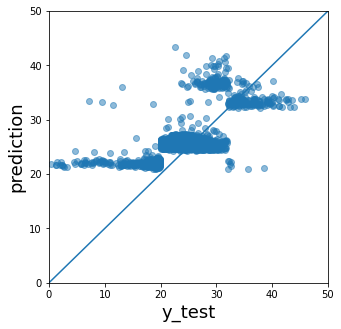

In [152]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, prediction,alpha=0.5)
plt.xlim(0,50)
plt.ylim(0,50)
plt.xlabel("y_test",fontsize=18)
plt.ylabel("prediction",fontsize=18)
x_values = [0,50]
y_values = [0,50]
plt.plot(x_values, y_values)

### 6. 사이킷런의SVR 모델을 불러온 후 아래 params로 예측을 진행하시오.
- kernel: rbf
- C: 50
- epsilon: 0.1

SVR모델에 적용해 fit한 후 X_test를 예측하여 y_predict란 이름에 저장하시오.
그리고 이 모델의 RMSE를 출력하시오.

In [154]:
from sklearn.svm import SVR
svr=SVR(kernel="rbf",C=50,epsilon=0.1)
svr.fit(X_train,y_train)

SVR(C=50)

In [156]:
y_predict = svr.predict(X_test)
svr_mse = mean_squared_error(y_test, y_predict)
svr_rmse = np.sqrt(lin_mse)
print("sklearn의 SVR모델의 RMSE:",svr_rmse)

sklearn의 SVR모델의 RMSE: 4.485652598663404


y_test와 y_predict의 관계를 그래프로 나타내시오.

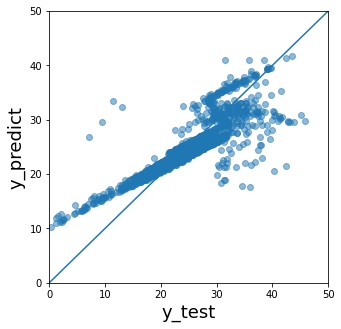

In [157]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_predict,alpha=0.5)
plt.xlim(0,50)
plt.ylim(0,50)
plt.xlabel("y_test",fontsize=18)
plt.ylabel("y_predict",fontsize=18)
x_values = [0,50]
y_values = [0,50]
plt.plot(x_values, y_values)

y_predict가 20 미만이거나 32 초과인 데이터는 1, 아니면 0으로 분류하시오.
그리고 X_test 데이터 셋에 y_faulty_predict 칼럼으로 추가하시오.

In [158]:
X_test['y_faculty_predict']=np.nan
X_test['y_faculty_predict']=[0 if y<20 or y>32 else 1 for y in y_predict]

<ipython-input-158-17d794c14412>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['y_faculty_predict']=np.nan
<ipython-input-158-17d794c14412>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['y_faculty_predict']=[0 if y<20 or y>32 else 1 for y in y_predict]


In [160]:
X_test['y_faculty_predict'].unique()

array([1, 0], dtype=int64)

### 7. 5- 6번 실습을 기반으로 LinearSVR과 SVR 모델을 비교하여 간단히 서술하시오.

답 :  이 데이터에 대해서는 rmse 값이 Linear SVR은 20.12 SVR 모델은 4.48인것으로 보아 SVR 모델의 성능이 더 좋습니다. 

### 뽀너스: Decision boundary 예제
출처:  https://jeongmin-lee.tistory.com/87 

In [166]:
# mglearn 이 없다는 경고문이 발생할 시 아래 코드를 실행해주세요.
# pip install mglearn

SyntaxError: invalid syntax (<ipython-input-166-4bddc4db35c5>, line 2)

학습용 데이터로 측정한 정확도 = 0.82
시험용 데이터로 측정한 정확도 = 0.80


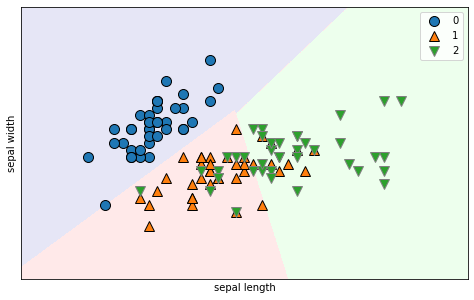

In [167]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import mglearn
%matplotlib inline

iris = load_iris()

# 시각화를 위해서 sepal length와 width만 사용한다.
x = iris['data'][:, [0,1]] # column 0과 1만 사용
y = iris['target']

# train 데이터 세트와 test 데이터 세트를 구성한다.
trainX, testX, trainY, testY = \
    train_test_split(x, y, test_size=0.2)

# SVM으로 Train 데이터 세트를 학습한다.
svm = SVC(kernel='linear')
svm.fit(trainX, trainY)

# 정확도를 계산한다.
print('학습용 데이터로 측정한 정확도 = %.2f' % svm.score(trainX, trainY))
print('시험용 데이터로 측정한 정확도 = %.2f' % svm.score(testX, testY))

# 시각화
plt.figure(figsize=(8, 5))
mglearn.plots.plot_2d_classification(svm, trainX, alpha=0.1)
mglearn.discrete_scatter(trainX[:,0], trainX[:,1], trainY)
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()